# **ANALISIS FAKTOR-FAKTOR YANG MEMPENGARUHI HARGA LAPTOP DI PASAR** #

**Nama : Satria Alfiandi Ramadhan Akbar**

**Kelas : C**

**NIM : 2509116089**



#### Banyak konsumen kesulitan menentukan laptop yang sesuai dengan kebutuhan dan budget karena banyaknya variasi spesifikasi dan perbedaan harga yang signifikan. Tujuan Studi Kasusnya melakukan analisis terhadap spesifikasi laptop untuk mengetahui faktor yang paling mempengaruhi harga serta membantu pengambilan keputusan pembelian maupun strategi penjualan. ####





# **Import Library** #

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Memuat Dataset** #

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df

Mounted at /content/gdrive


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


[Link Dataset Kaggle saya](https://www.kaggle.com/datasets/muhammetvarl/laptop-price)

# **Business Understanding** #

## **Business Objective**

Tujuan Bisnisnya adalah memahami variabel apa saja yang paling signifikan dalam menentukan harga sebuah laptop. Kemudian masalah utamanya yaitu perbedaan harga laptop sangat bervariasi meskipun spesifikasinya terlihat mirip, konsumen sulit menentukan laptop terbaik sesuai budget, dan penjual belum tentu mengetahui faktor spesifikasi mana yang paling mempengaruhi harga.

## **Assess Situation**

Kondisi Dataset saya yaitu data memiliki campuran tipe data kuantitatif (harga, berat, RAM) dan kualitatif (merk, sistem operasi, tipe layar), dataset memiliki 1303 baris, dan beberapa kolom seperti RAM dan Storage masih mengandung satuan (GB/TB).

Kemudian tantangan dataset saya yaitu perlu cleaning data seperti menghapus simbol mata uang, satuan GB, dll, banyak fitur kategorikal (Brand, GPU, CPU) perlu encoding, potensi adanya outlier pada laptop kategori high-end atau gaming yang harganya jauh di atas rata-rata. Resikonya data tidak lengkap atau tidak konsisten.

## **Analytic Goals Project Plan**

[Analytic Goals]
1. Menganalisis distribusi harga laptop.
2. Membandingkan rata-rata harga berdasarkan brand.
3. Menganalisis hubungan antara (RAM dan Harga, Storage dan Harga, Berat dan Harga).
4. Mengidentifikasi spesifikasi yang paling berpengaruh terhadap harga.
5. Membuat model prediksi harga laptop.

[Project Plan]
1. Mengeksplorasi struktur data (baris dan kolom) serta tipe data setiap variabel.
2. Melakukan pembersihan data (cleaning) dari nilai yang hilang.
3. Membuat visualisasi awal seperti Scatter Plot untuk melihat hubungan spesifikasi dengan harga.
4. Membangun Dashboard interaktif menggunakan tools seperti Tableau.

# **Data Understanding**

## **Memuat Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


## **Deskripsi Data**

### **Informasi Dasar**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 1303 baris dan 13 kolom.

### **Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


1. laptop_ID:
        Jumlah baris: 1303
        Tipe data: int64
        Deskripsi: ID Unik Laptop

2. Company:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Nama Produsen/Perusahaan

3. Product:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Nama Model Produk

4. TypeName:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Tipe/Kategori Laptop (Notebook, Gaming, dll.)

5. Inches:
        Jumlah baris: 1303
        Tipe data: float64
        Deskripsi: Ukuran Layar dalam Inci

6. ScreenResolution:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Resolusi Layar

7. Cpu:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Unit Pemrosesan Pusat (Processor)

8. Ram:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Kapasitas Memori RAM

9. Memory:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Kapasitas Hard Disk / SSD

10. Gpu:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Unit Pemrosesan Grafis (VGA)

11. OpSys:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Sistem Operasi

12. Weight:
        Jumlah baris: 1303
        Tipe data: object
        Deskripsi: Berat Laptop

13. rice_euros:
        Jumlah baris: 1303
        Tipe data: float64
        Deskripsi: Harga dalam Mata Uang Euro

### **Informasi Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


1. Count (Kelengkapan Data)
Berdasarkan data, total baris transaksi adalah 1303. Maka dapat disimpulkan:
* Semua kolom memiliki jumlah 1303 baris
* Tidak ada data yang hilang (missing values) pada seluruh kolom dataset ini.

Kesimpulan: Dataset sudah bersih (clean). Tidak diperlukan data cleaning untuk menangani missing value karena seluruh atribut lengkap.



---



2. Mean vs Median (Distribusi Data)

* Kolom laptop_ID
  * Mean = 660,16
  * Median = 659 - Nilai rata-rata sedikit lebih besar dari median

  Ini hanya nomor identitas data → tidak memiliki makna analitik

* Kolom Inches
 * Mean = 15,01
 * Median = 15,60 - Median sedikit lebih besar dari mean

 Ini menunjukkan distribusi ukuran layar laptop cukup stabil dan terkonsentrasi di ukuran standar (15 inci).

* Kolom Price_euros
  * Mean = 1123,69
  * Median = 977,00 - Rata-rata lebih besar dari median
  
  Ini menunjukkan bahwa beberapa model laptop dengan harga yang sangat tinggi (laptop high-end/gaming) yang menarik nilai rata-rata ke atas.

Kesimpulan: Secara keseluruhan, data bersifat right-skewed (condong ke kanan) karena dipengaruhi oleh produk-produk premium, sementara untuk ukuran layar cenderung terdistribusi normal di sekitar ukuran 15 inci.



---



3. Min dan Max (Validasi Logika)

* laptop_ID
  * Min = 1
  * Max = 1320

* Inches
  * Min = 10,1
  * Max = 18,4

* Price_euros
  * Min = 174,00
  * Max = 6.099,00

Kesimpulan:
* Tidak ditemukan nilai anomali atau error input.
* Semua nilai berada dalam rentang realistis pasar laptop.



---



4. Standar Deviasi (std) - Variabilitas Data

* Price_euros
  * Mean = 1123,69
  * Std = 699,01

* Inches
  * Mean = 15,02
  * Std = 1,42

Kesimpulan:

* Pada kolom Price_euros, nilai standar deviasi (699) mencapai sekitar 62% dari nilai rata-ratanya. Ini mengindikasikan variasi harga yang sangat tinggi antar produk dalam dataset.

* Pada kolom Inches, standar deviasi yang kecil (1,42) menunjukkan bahwa ukuran layar laptop tidak terlalu beragam; mayoritas produk memiliki ukuran yang mirip atau tidak jauh dari rata-rata 15 inci.

## **VERIFIKASI KUALITAS DATA**

### **Data Type Check**

Dan dapat dilihat di bawah ini, kolom Ram, Weight dan Memory bertipe data object, seharusnya kedua kolom ini bertipe data numerik (int atau float) karena merepresentasikan besaran kapasitas memori dan berat fisik. Selain itu, semua kolom sudah sesuai.

In [ ]:
df.dtypes

,0
laptop_ID,int64
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


### **Incosistent Values**

1. **Memory**

Pada kolom ini, dapat terlihat ini adalah yang paling tidak konsisten. Isinya mencampurkan kapasitas, tipe penyimpanan, dan terkadang memiliki dua jenis penyimpanan sekaligus. Formatnya sangat beragam, seperti 128GB SSD, 1TB HDD, dan 128GB SSD + 1TB HDD. Ada juga penggunaan unit yang berbeda (GB dan TB).

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

2. **Ram** dan **Weight**

Pada kolom ini, dapat terlihat data dalam kolom ini bersifat numerik, namun mengandung teks satuan seperti "GB" dan "kg". Komputer membacanya sebagai Object/teks, sehingga tidak bisa melakukan operasi matematika (seperti menghitung rata-rata berat atau RAM) sebelum teks tersebut dihapus.


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

3. **OpSys**

Pada kolom ini, dapat terlihat variasi penulisan untuk sistem operasi yang sama, yang akan dianggap berbeda oleh komputer contohnya macOS dan ada Mac OS X. Kemudian Windows 10 dan Windows 10 S bisa dikategorikan sebagai satu grup Windows 10.

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

4. **ScreenResolution**

Pada kolom ini, dapat terlihat inkonsistensi yang signifikan karena menggabungkan berbagai atribut informasi seperti tipe panel (IPS, Retina), fitur interaksi (Touchscreen), deskripsi kualitas (Full HD, Quad HD+), hingga resolusi piksel mentah (misalnya 1920x1080) ke dalam satu string teks yang tidak seragam.

In [17]:
df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

5. **Cpu** dan **Gpu**

Pada kolom ini, dapat terlihat dari tingkat kedetailan penamaan yang sangat bervariasi, di mana data tersebut mencampurkan merek utama (seperti Intel, AMD, atau Nvidia), seri prosesor (Core i7, Ryzen 5), hingga spesifikasi teknis spesifik seperti kecepatan clock dalam satuan GHz yang sering kali ditulis secara manual.


In [18]:
df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [19]:
df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

6. **Price_euros**

Pada kolom ini terletak pada variasi skala nilai yang sangat lebar (dari ratusan hingga ribuan Euro) serta potensi perbedaan format penulisan tanda pemisah desimal yang sering kali tercampur antara penggunaan titik atau koma tergantung pada sumber input datanya. Selain itu, karena harga laptop sangat fluktuatif berdasarkan kombinasi spesifikasi teknis dari kolom lain

In [8]:
df = pd.read_csv("/content/drive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['Price_euros'].unique()

array([1339.69,  898.94,  575.  , 2537.45, 1803.6 ,  400.  , 2139.97,
       1158.7 , 1495.  ,  770.  ,  393.9 ,  344.99, 2439.97,  498.9 ,
       1262.4 , 1518.55,  745.  , 2858.  ,  499.  ,  979.  ,  191.9 ,
        999.  ,  258.  ,  819.  ,  659.  ,  418.64, 1099.  ,  800.  ,
       1298.  ,  896.  ,  244.99,  199.  ,  439.  , 1869.  ,  998.  ,
        249.  ,  367.  ,  488.69,  879.  ,  389.  , 1499.  ,  522.99,
        682.  , 1419.  ,  369.  , 1299.  ,  639.  ,  466.  ,  319.  ,
        841.  ,  398.49, 1103.  ,  384.  ,  767.8 ,  586.19, 2449.  ,
        415.  ,  599.  ,  941.  ,  690.  , 1983.  ,  438.69,  229.  ,
        549.  ,  949.  , 1089.  ,  955.  ,  870.  , 1095.  ,  519.  ,
        855.  ,  530.  ,  977.  , 1096.16, 1510.  ,  860.  ,  399.  ,
        395.  , 1349.  ,  699.  ,  598.99, 1449.  , 1649.  ,  689.  ,
       1197.  , 1195.  , 1049.  ,  847.  ,  599.9 ,  485.  ,  577.  ,
       1249.  ,  719.  ,  349.  ,  647.  , 1119.  , 1340.  ,  414.9 ,
       1193.  , 1480

7. **Inches**

Pada kolom ini terlihat pada penggunaan tipe data yang tidak seragam di mana beberapa nilai mungkin terbaca sebagai teks (string) sementara yang lain sebagai angka (numeric), serta adanya variasi standar ukuran layar yang sangat luas dari laptop ultra-portabel hingga workstation besar. Ketidakkonsistenan ini sering kali muncul akibat perbedaan penggunaan tanda pemisah desimal (titik vs koma) atau adanya spasi tambahan di sekitar angka.


In [13]:
df = pd.read_csv("/content/drive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

8. **Product**

Pada kolom ini terlihat adanya inkonsistensi yang signifikan karena penamaan model laptop tidak mengikuti standar yang kaku, melainkan mencampurkan nama seri (seperti "MacBook Air" atau "Inspiron") dengan kode model spesifik yang sering kali mengandung kesalahan ketik atau variasi spasi dan tanda baca. Ketidakteraturan ini sering kali menyebabkan satu produk yang sebenarnya identik muncul sebagai beberapa entitas berbeda hanya karena perbedaan kecil dalam penulisan, misalnya penggunaan tanda strip yang tidak konsisten atau penambahan detail spesifikasi singkat di belakang nama produk.

In [12]:
df = pd.read_csv("/content/drive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

8. **laptop_ID**

Pada kolom ini terlihat inkonsistensi utama terletak pada kolom laptop_ID yang hanya berisi urutan angka dari 1 hingga 1320, di mana secara teknis kolom ini bersifat redundan karena hanya menduplikasi fungsi indeks baris dan tidak memberikan nilai informasi unik bagi analisis data.

In [15]:
df = pd.read_csv("/content/drive/MyDrive/data set/laptop_price.csv", encoding='latin1')
df['laptop_ID'].unique()

array([   1,    2,    3, ..., 1318, 1319, 1320])

### **Missing Values**

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa seluruh Kolom (Company, Product, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price_euros) memiliki missing values sebesar 0%, yang artinya dataset ini sudah terisi lengkap secara struktural dan tidak ada baris yang kosong. Semua informasi pada 1.303 baris data tersedia sepenuhnya sehingga tidak ada kolom yang perlu dihapus karena alasan data hilang.

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
laptop_ID,0.0
Company,0.0
Product,0.0
TypeName,0.0
Inches,0.0
ScreenResolution,0.0
Cpu,0.0
Ram,0.0
Memory,0.0
Gpu,0.0


### **Duplicated Values**

In [ ]:
df[df.duplicated()]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


Terlihat pada dataset ini pada seluruh kolom dari Company hingga Price_euros tidak ada baris yang 100% sama. Setiap entri memiliki kombinasi spesifikasi yang unik atau setidaknya dibedakan oleh laptop_ID

In [ ]:
df = df.drop_duplicates()

### **Outliers Values**

Dan terlihat kolom

* Price_euros
terdapat 29 data yang dikategorikan sebagai laptop dengan harga sangat tinggi, umumnya di atas 2.974 Euro.

  Dengan presentase 2.23%

* Inches
terdapat 42 data yang dikategorikan terutama pada ukuran layar yang sangat kecil seperti 11.6 inci atau sangat besar seperti 18.4 inci.

  Dengan presentase 3.22%

* Ram
terdapat 65 data yang dikategorikan. Hal ini karena mayoritas laptop menggunakan RAM 4GB atau 8GB, sehingga laptop dengan RAM 16GB ke atas (terutama 32GB dan 64GB) dianggap sebagai data ekstrem.

  Dengan presentase 4.99%

* Weight
terdapat 45 data yang dikategorikan sebagai pencilan. Ini mencakup laptop yang sangat ringan (di bawah 0.9kg) atau laptop gaming "monster" yang beratnya mencapai 4kg hingga 4.7kg.

  Dengan presentase 3.45%

* OpSys
terdapat beberapa sistem operasi yang sangat jarang muncul dibandingkan Windows atau macOS, seperti Android dan Mac OS X (versi lama).

  Dengan presentase 0.61%

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
laptop_ID,0.000000
Inches,2.993093
Price_euros,2.225633


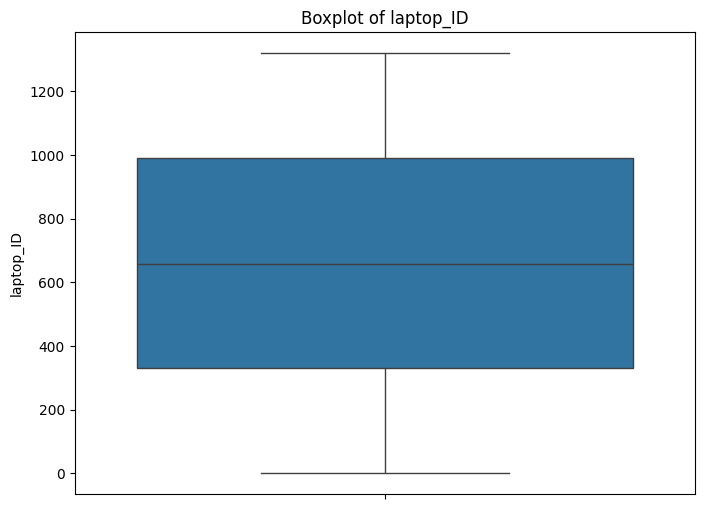

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/data set/laptop_price.csv", encoding='latin1')

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['laptop_ID'])
plt.title('Boxplot of laptop_ID')
plt.ylabel('laptop_ID')
plt.show()

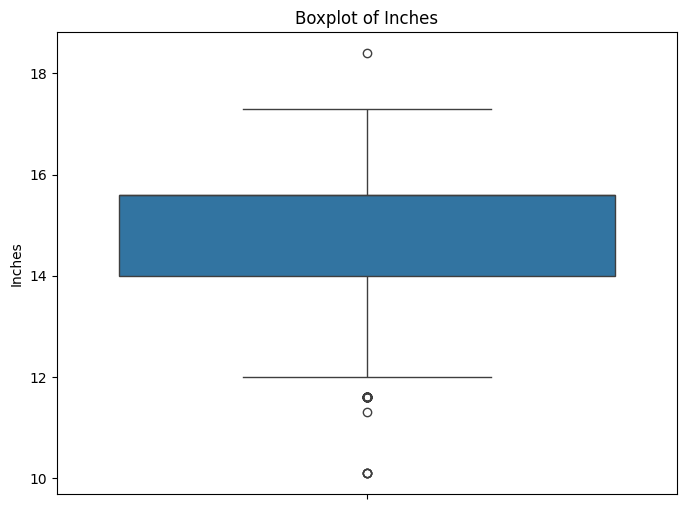

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Inches'])
plt.title('Boxplot of Inches')
plt.ylabel('Inches')
plt.show()

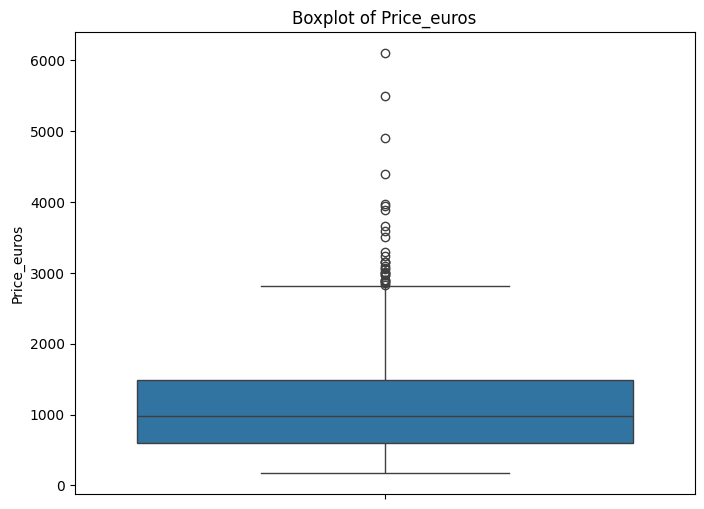

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price_euros'])
plt.title('Boxplot of Price_euros')
plt.ylabel('Price_euros')
plt.show()

# **Eksplorasi Data (EDA)**

## **Comparison/Perbandingan**

Aktivitas: Membandingkan Total Harga Laptop berdasarkan Perusahaan (Brand)

Tujuan: Mengidentifikasi brand (perusahaan) mana yang memiliki kontribusi nilai ekonomi terbesar dalam dataset ini. Hal ini membantu karena dapat memahami dominasi pasar dari sisi nominal harga, bukan sekadar jumlah unit.

Visualisasi: Bar Chart (Grafik Batang).

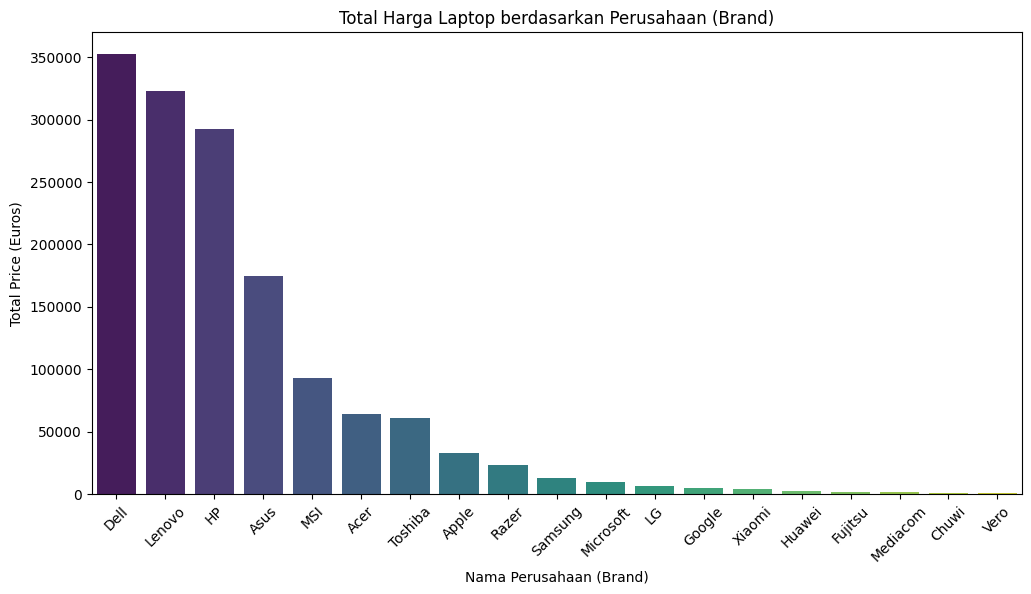

In [ ]:
variabel = df.groupby('Company')['Price_euros'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=variabel.index, y=variabel.values, palette='viridis', hue=variabel.index, legend=False)
plt.title('Total Harga Laptop berdasarkan Perusahaan (Brand)')
plt.xlabel('Nama Perusahaan (Brand)')
plt.ylabel('Total Price (Euros)')
plt.xticks(rotation=45)
plt.show()

**Insight yang diperoleh :** terlihat bahwa Dell, Lenovo, dan HP adalah brand utama yang memiliki volume stok/penjualan terbesar. Kemudian posisi Razer atau Apple. Meskipun jumlah unitnya mungkin tidak sebanyak HP atau Lenovo, total nilainya tetap tinggi. Ini menunjukkan bahwa brand tersebut menjual produk dengan harga rata-rata yang jauh lebih mahal

## **Composition/Komposisi**

Aktivitas: Menganalisis Komposisi Tipe Laptop (TypeName) dalam Dataset

Tujuan: Mengidentifikasi proporsi setiap jenis laptop (seperti Notebook, Gaming, Ultrabook, dll.) guna memahami kategori produk mana yang paling umum ditawarkan di pasar.

Visualisasi: Pie Chart (Grafik Lingkaran).

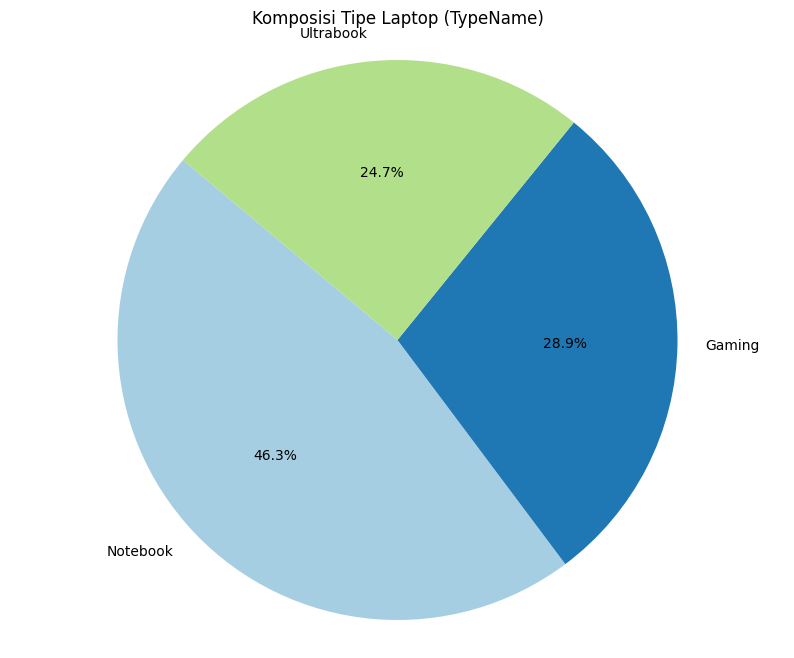

In [ ]:
variabel = df.groupby('TypeName')['Price_euros'].sum().sort_values(ascending=False)
variabe2 = variabel.head(3)

plt.figure(figsize=(10, 8))
variabel.head(3).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Komposisi Tipe Laptop (TypeName)')
plt.ylabel('')
plt.axis('equal')
plt.show()

**Insight yang diperoleh :** dari grafik tersebut menunjukkan bahwa pasar laptop sangat terkonsentrasi pada tiga kategori utama, di mana Notebook mendominasi porsi terbesar sebagai segmen pasar paling masif dan umum digunakan. Kehadiran Gaming dan Ultrabook dalam jajaran tiga besar mencerminkan pergeseran minat konsumen atau alokasi modal yang signifikan pada perangkat berperforma tinggi yang memiliki nilai jual lebih premium.

## **Distribution/Distribusi**

Aktivitas: Menganalisis Distribusi Harga Laptop (Price_euros)

Tujuan: Melihat persebaran harga produk dalam dataset untuk mengidentifikasi apakah data cenderung berkumpul di rentang harga tertentu (misalnya kelas entry-level) dan mendeteksi adanya nilai ekstrem (outliers) pada laptop premium.

Visualisasi: Histogram.

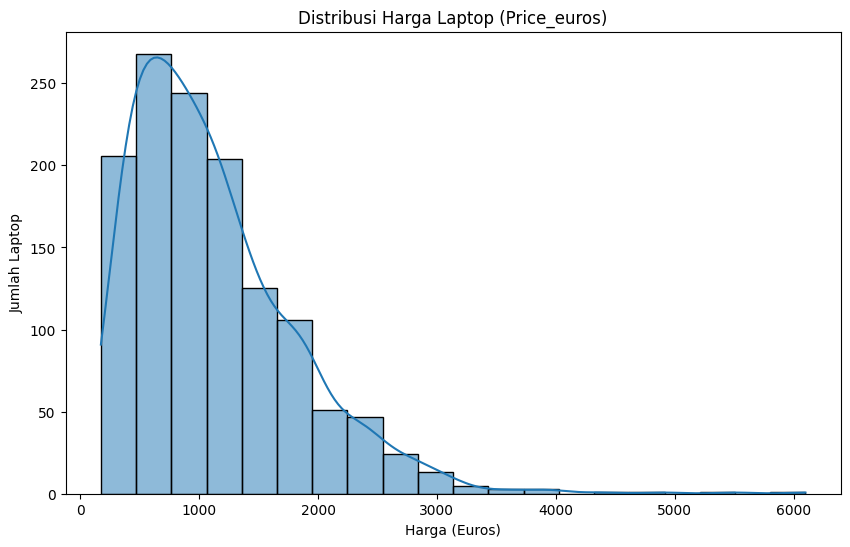

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], bins=20, kde=True)
plt.title('Distribusi Harga Laptop (Price_euros)')
plt.xlabel('Harga (Euros)')
plt.ylabel('Jumlah Laptop')
plt.show()

**Insight yang diperoleh :** dari grafik distribusi tersebut menunjukkan bahwa sebagian besar laptop dalam dataset terkonsentrasi pada rentang harga terjangkau hingga menengah, yang mengindikasikan bahwa pasar lebih didominasi oleh perangkat untuk kebutuhan komputasi harian atau entry-level. Bentuk grafik yang condong ke kanan (right-skewed) dengan ekor yang memanjang menjelaskan bahwa frekuensi laptop semakin menurun drastis seiring bertambahnya harga, namun tetap terdapat sejumlah kecil laptop kategori high-end atau premium dengan harga ekstrem yang bertindak sebagai outliers. Hal ini memberikan gambaran bahwa pilihan konsumen sangat melimpah pada kisaran harga rendah, sementara laptop dengan spesifikasi tinggi yang sangat mahal merupakan produk khusus dengan ketersediaan yang jauh lebih terbatas di pasar.

## **Relationship/Hubungan**

Aktivitas: Menganalisis Korelasi antara Kapasitas RAM dan Harga Laptop (Price_euros)

Tujuan: Mengetahui apakah peningkatan kapasitas RAM memiliki hubungan linear yang kuat terhadap harga laptop, serta mengidentifikasi apakah terdapat variasi harga yang besar pada kapasitas RAM yang sama.

Visualisasi: Heatmap.

In [12]:
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/data set/laptop_price.csv", encoding='latin1')

df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

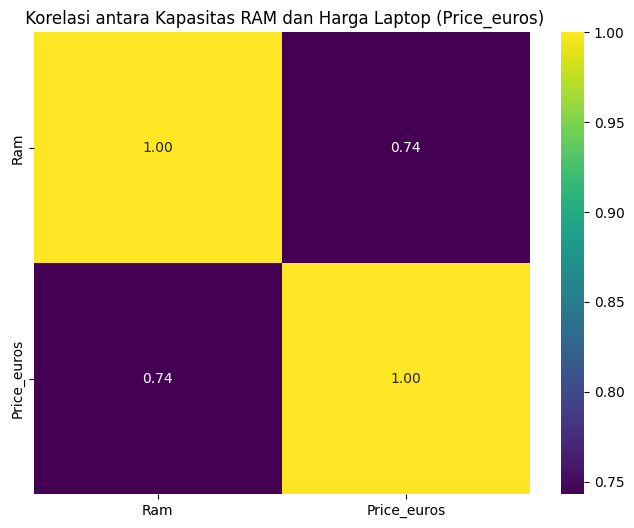

In [8]:

plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['Ram', 'Price_euros']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title(' Korelasi antara Kapasitas RAM dan Harga Laptop (Price_euros)')
plt.show()

**Insight yang diperoleh :** terdapat korelasi positif yang kuat sebesar 0,74 antara kapasitas RAM dan harga laptop (Price_euros). Hal ini menunjukkan bahwa penambahan kapasitas RAM memiliki pengaruh signifikan terhadap kenaikan harga jual laptop. Nilai 0,74 ini berada dalam kategori korelasi tinggi, yang menandakan bahwa RAM adalah salah satu faktor penentu utama dalam struktur harga laptop pada dataset saya.



# **Menyimpan Dataset**

In [16]:
df.to_csv('[Bersih]laptop_price.csv', index=False)